<a href="https://colab.research.google.com/github/TazeemKhan9/MNIST/blob/main/Case%20Study/PCA_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn import linear_model
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [ ]:
a=time.time

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train=pd.read_csv("/content/drive/My Drive/mnist_train.csv")
test=pd.read_csv("/content/mnist_test.csv")
test_target=test['label']
test_x=test.drop('label',axis=1)
train_target=train['label']
train_x=train.drop('label',axis=1)

In [ ]:
test_x=np.array(test_x)
train_x=np.array(train_x) 

In [ ]:
test_x=test_x.astype(float)
test_x=test_x/255
train_x=train_x.astype(float)
train_x=train_x/255

In [ ]:
train_x[0].shape

(784,)

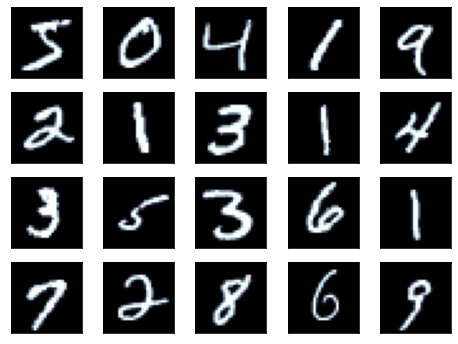

In [ ]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(8, 6))
# plot several images
for i in range(20):
    ax = fig.add_subplot(4, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(train_x[i].reshape((28, 28)),cmap=plt.cm.bone)

# WITHOUT PCA LOGISTIC

In [ ]:
from sklearn.linear_model import LogisticRegression
logisticregression = LogisticRegression()
logisticregression.fit(train_x, train_target)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = logisticregression.predict(test_x)
print(y_pred)

[7 2 1 ... 4 5 6]


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(test_target, y_pred)

0.9258

# WITHOUT PCA LDA

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
clf=LinearDiscriminantAnalysis()
clf.fit(train_x,train_target)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [ ]:
pred=clf.predict(test_x)
accuracy=accuracy_score(pred,test_target)
print(accuracy)

0.873


# WITHOUT PCA NEURAL NETWORK

In [ ]:
from keras import models
from keras import layers
from keras.utils import to_categorical

In [ ]:
train_x.shape

(60000, 784)

In [ ]:
test_x.shape
train_target_new=to_categorical(train_target)
test_target_new=to_categorical(test_target)

In [ ]:
nn=models.Sequential()

In [ ]:
nn.add(layers.Dense(1024,activation="relu",input_shape=(784,)))
nn.add(layers.Dense(512,activation="relu"))
nn.add(layers.Dense(256,activation="relu"))
nn.add(layers.Dense(10,activation="softmax"))

In [ ]:
nn.summary()


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 1024)              803840    
_________________________________________________________________
dense_29 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_30 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_31 (Dense)             (None, 10)                2570      
Total params: 1,462,538
Trainable params: 1,462,538
Non-trainable params: 0
_________________________________________________________________


In [ ]:
nn.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
seconds = time.time()
nn.fit(train_x,train_target_new,batch_size=200,epochs=50)
end=time.time()

Epoch 1/50
300/300 [==============================] - 1s 4ms/step - loss: 0.0050 - accuracy: 0.9995
Epoch 2/50
300/300 [==============================] - 1s 4ms/step - loss: 0.0057 - accuracy: 0.9995
Epoch 3/50
300/300 [==============================] - 1s 4ms/step - loss: 0.0044 - accuracy: 0.9996
Epoch 4/50
300/300 [==============================] - 1s 4ms/step - loss: 0.0026 - accuracy: 0.9997
Epoch 5/50
300/300 [==============================] - 1s 4ms/step - loss: 0.0016 - accuracy: 0.9998
Epoch 6/50
300/300 [==============================] - 1s 4ms/step - loss: 0.0061 - accuracy: 0.9995
Epoch 7/50
300/300 [==============================] - 1s 4ms/step - loss: 0.0064 - accuracy: 0.9995
Epoch 8/50
300/300 [==============================] - 1s 4ms/step - loss: 0.0056 - accuracy: 0.9995
Epoch 9/50
300/300 [==============================] - 1s 4ms/step - loss: 0.0030 - accuracy: 0.9996
Epoch 10/50
300/300 [==============================] - 1s 4ms/step - loss: 0.0017 - accuracy: 0.9997

In [ ]:
print("Time taken is:",end-seconds)

Time taken is: 55.449357748031616


In [ ]:
nn.evaluate(test_x, test_target_new)[1]

313/313 [==============================] - 1s 2ms/step - loss: 0.6072 - accuracy: 0.9854


0.9854000210762024

# PCA

In [ ]:
from sklearn import decomposition
pca = decomposition.PCA()
pca1=pca.fit(train_x)

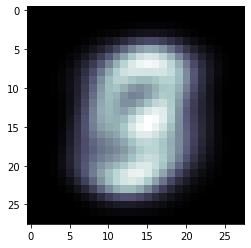

In [ ]:
plt.imshow(pca.mean_.reshape(28, 28), cmap=plt.cm.bone)

In [ ]:
print(pca1.components_.shape) ## Eigen Face

(784, 784)


In [ ]:
print(pca1.explained_variance_)## Eigen Value

[5.11687301e+00 3.74139084e+00 3.25270845e+00 2.84162070e+00
 2.56711774e+00 2.27366339e+00 1.72515498e+00 1.52056024e+00
 1.45630525e+00 1.24275009e+00 1.11208951e+00 1.06664054e+00
 9.04680833e-01 8.92181223e-01 8.32353048e-01 7.81900323e-01
 6.98386871e-01 6.73255811e-01 6.25995240e-01 6.07763020e-01
 5.62145880e-01 5.30798829e-01 5.02780255e-01 4.81147033e-01
 4.65783200e-01 4.42538691e-01 4.28439606e-01 4.14618707e-01
 3.92667337e-01 3.64261791e-01 3.46985958e-01 3.41741890e-01
 3.17734284e-01 3.09280821e-01 3.00549034e-01 2.86632712e-01
 2.66680512e-01 2.57227909e-01 2.53838022e-01 2.49006738e-01
 2.40823990e-01 2.34543854e-01 2.20658652e-01 2.09962678e-01
 2.02981381e-01 1.97776690e-01 1.90872477e-01 1.85379715e-01
 1.79298798e-01 1.69711256e-01 1.68204657e-01 1.64929264e-01
 1.56059568e-01 1.52353954e-01 1.49810350e-01 1.43117013e-01
 1.42107650e-01 1.36282013e-01 1.33802866e-01 1.29062999e-01
 1.26809057e-01 1.26153552e-01 1.21484982e-01 1.16804842e-01
 1.12686254e-01 1.092614

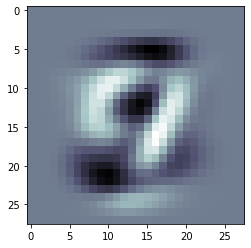

In [ ]:
plt.imshow(pca1.components_[1].reshape(28,28),cmap=plt.cm.bone)

In [ ]:
np.cumsum(pca.explained_variance_ratio_) ## Taking 100 components

array([0.09704664, 0.16800588, 0.22969677, 0.28359097, 0.33227894,
       0.37540125, 0.40812055, 0.4369595 , 0.4645798 , 0.4881498 ,
       0.5092417 , 0.52947161, 0.54662979, 0.56355091, 0.57933732,
       0.59416685, 0.60741246, 0.62018143, 0.63205406, 0.6435809 ,
       0.65424256, 0.66430969, 0.67384542, 0.68297086, 0.69180491,
       0.7001981 , 0.70832389, 0.71618755, 0.72363488, 0.73054347,
       0.73712441, 0.74360589, 0.74963204, 0.75549786, 0.76119807,
       0.76663435, 0.77169222, 0.7765708 , 0.7813851 , 0.78610776,
       0.79067523, 0.79512359, 0.7993086 , 0.80329076, 0.8071405 ,
       0.81089154, 0.81451162, 0.81802754, 0.82142812, 0.82464686,
       0.82783703, 0.83096508, 0.83392491, 0.83681446, 0.83965576,
       0.84237012, 0.84506533, 0.84765006, 0.85018776, 0.85263557,
       0.85504063, 0.85743326, 0.85973735, 0.86195267, 0.86408988,
       0.86616213, 0.86819256, 0.87016038, 0.87208891, 0.87397523,
       0.875845  , 0.87765583, 0.87943146, 0.88118044, 0.88283

In [ ]:
pca = decomposition.PCA(100)
pca1=pca.fit(train_x)

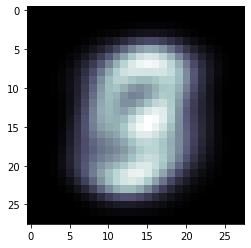

In [ ]:
plt.imshow(pca1.mean_.reshape(28, 28), cmap=plt.cm.bone)

In [ ]:
print(pca1.components_.shape) ## Eigen Face

(100, 784)


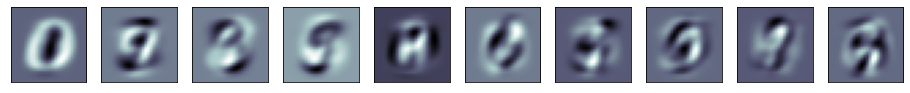

In [ ]:
fig = plt.figure(figsize=(16, 6)) ## Plotting using 100 components
for i in range(10):
    ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(pca1.components_[i].reshape(28,28),
              cmap=plt.cm.bone)

In [ ]:
projected = pca1.fit_transform(train_x) ## Omega 
projected.shape

(60000, 100)

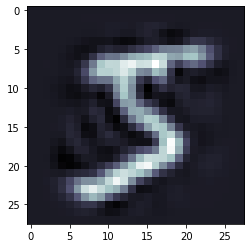

In [ ]:
## PROJECTED IMAGE
inv_proj3 = pca1.inverse_transform(projected)
plt.imshow(inv_proj3[0].reshape(28,28),cmap=plt.cm.bone)

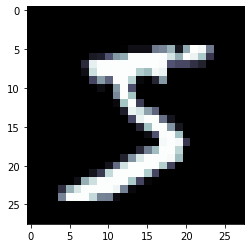

In [ ]:
## ORIGINAL IMAGE
plt.imshow(train_x[0].reshape(28,28),cmap=plt.cm.bone)

# PCA WITH LOGISTIC REGRESSION

In [ ]:
train_x.shape
train_target.shape

(60000,)

In [ ]:
x_train = pca1.fit_transform(train_x) #Omega for train data
x_test= pca1.transform(test_x)#Converting x_test to Omega form 
print(x_train.shape,x_test.shape)

(60000, 100) (10000, 100)


In [ ]:
from sklearn.linear_model import LogisticRegression
logisticregression = LogisticRegression()
logisticregression.fit(x_train, train_target)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = logisticregression.predict(x_test)
print(y_pred)

[7 2 1 ... 4 5 6]


In [ ]:
accuracy_score(test_target, y_pred)

0.9205

# WITH PCA LDA

In [ ]:
clf=LinearDiscriminantAnalysis()
clf.fit(x_train,train_target)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [ ]:
pred=clf.predict(x_test)
accuracy=accuracy_score(pred,test_target)
print(accuracy)

0.8776


# WITH PCA NEURAL NETWORK

In [ ]:
x_train.shape
x_test.shape

(10000, 100)

In [ ]:
nn=models.Sequential()

In [ ]:
nn.add(layers.Dense(1024,activation="relu",input_shape=(100,)))
nn.add(layers.Dense(512,activation="relu"))
nn.add(layers.Dense(256,activation="relu"))
nn.add(layers.Dense(10,activation="softmax"))

In [ ]:
nn.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 1024)              103424    
_________________________________________________________________
dense_33 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_34 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_35 (Dense)             (None, 10)                2570      
Total params: 762,122
Trainable params: 762,122
Non-trainable params: 0
_________________________________________________________________


In [ ]:
nn.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
seconds = time.time()
nn.fit(x_train,train_target_new,batch_size=200,epochs=50)
end=time.time()

Epoch 1/50
300/300 [==============================] - 1s 3ms/step - loss: 0.2080 - accuracy: 0.9357
Epoch 2/50
300/300 [==============================] - 1s 3ms/step - loss: 0.0709 - accuracy: 0.9776
Epoch 3/50
300/300 [==============================] - 1s 3ms/step - loss: 0.0455 - accuracy: 0.9861
Epoch 4/50
300/300 [==============================] - 1s 3ms/step - loss: 0.0298 - accuracy: 0.9907
Epoch 5/50
300/300 [==============================] - 1s 3ms/step - loss: 0.0219 - accuracy: 0.9927
Epoch 6/50
300/300 [==============================] - 1s 3ms/step - loss: 0.0168 - accuracy: 0.9945
Epoch 7/50
300/300 [==============================] - 1s 3ms/step - loss: 0.0155 - accuracy: 0.9954
Epoch 8/50
300/300 [==============================] - 1s 3ms/step - loss: 0.0121 - accuracy: 0.9965
Epoch 9/50
300/300 [==============================] - 1s 3ms/step - loss: 0.0121 - accuracy: 0.9964
Epoch 10/50
300/300 [==============================] - 1s 3ms/step - loss: 0.0111 - accuracy: 0.9967

In [ ]:
print("Time taken is:",end-seconds) ## Improvement of 14 seconds

Time taken is: 41.33914279937744


In [ ]:
nn.evaluate(x_test, test_target_new)[1]

313/313 [==============================] - 1s 2ms/step - loss: 0.3442 - accuracy: 0.9801


0.9800999760627747